In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bhdata = pd.read_excel('boston housing.xls')

In [4]:
bhdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [5]:
bhdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
bhdata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


<AxesSubplot:>

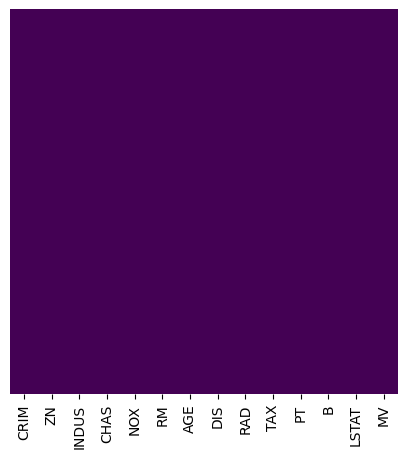

In [7]:
#to check if there are any null values in the dataframe
plt.figure(figsize=(5,5))
sns.heatmap(bhdata.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Coefficient:  [ 3.81607162  0.05026324  0.00976733 -1.21503906 -1.0611368  -0.70773502
 -0.02106504]
r-squared value 0.6730700956844411


,Actual Value,Predicted Value,Difference
329,22.600000,26.193108,-3.593107
371,50.000000,25.100583,24.899417
219,23.000000,27.049202,-4.049202
403,8.300000,14.196720,-5.896720
78,21.200001,20.690807,0.509193


<Figure size 1200x1000 with 0 Axes>

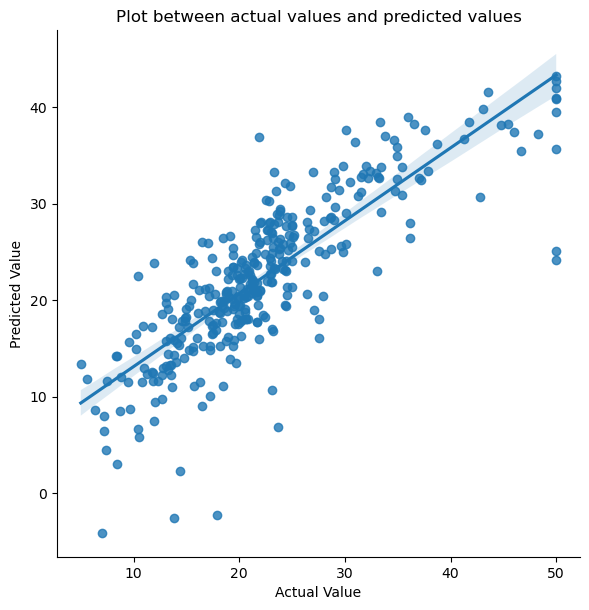

In [9]:
X = bhdata[['RM', 'ZN', 'B', 'DIS', 'PT', 'LSTAT', 'RAD']]
y = bhdata['MV']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=0)

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('Coefficient: ', regr.coef_)

print("RMSE value", r2_score(y_test, y_pred))

plt.figure(figsize=(12,10))


import matplotlib.pyplot as plt
import seaborn as sns
y_pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})

sns.lmplot(x='Actual Value', y='Predicted Value', data=y_pred_df, height=6, aspect=1)
ax = plt.gca()
ax.set_title('Plot between actual values and predicted values')

y_pred_df.head()



In [10]:
df_loan=pd.read_excel("loan.xlsx")
df_loan

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,M,34.169998,2.750,owner,given,guard_etc,self_empl,2,0,t,given,232,200,reject
425,F,22.250000,1.250,rent,not_given,unemploye,unemploye,3,0,f,given,280,0,reject
426,M,23.330000,1.500,owner,given,creative_,governmen,1,0,f,given,422,200,accept
427,M,21.000000,4.790,rent,not_given,productio,private_s,2,1,t,given,80,300,accept


In [11]:
null_cols = df_loan.columns[df_loan.isna().any()].tolist()
print(null_cols)
print("Number of null cols: ", len(null_cols))

[]
Number of null cols:  0


In [12]:
df_loan = pd.get_dummies(df_loan, columns = ['Sex', 'Res_status', 'Telephone', 'Occupation', 'Job_status', 'Liab_ref', 'Acc_ref'])
df_loan['Decision'] = df_loan['Decision'].replace(['accept','reject'],[1,0])


In [13]:
df_loan

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Sex_F,Sex_M,Res_status_owner,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,50.750000,0.585,0,0,145,0,0,0,1,1,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,52.830002,15.000,5,14,0,2200,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200,0,0,1,1,...,0,0,0,1,0,0,0,1,1,0
425,22.250000,1.250,3,0,280,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
426,23.330000,1.500,1,0,422,200,1,0,1,1,...,0,0,0,0,0,0,1,0,1,0
427,21.000000,4.790,2,1,80,300,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [14]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

lrf = LogisticRegression()

df_loan = df_loan[['Time_employed', 'Time_bank', 'Home_Expn', 'Balance', 'Decision',
                           'Res_status_owner', 'Telephone_given', 'Occupation_guard_etc', 
                           'Occupation_professio', 'Occupation_semi_pro', 
                           'Job_status_governmen', 'Job_status_private_s', 'Job_status_self_empl']]
y = df_loan['Decision']
X = df_loan[['Time_employed', 'Time_bank', 'Home_Expn', 'Balance', 
                           'Res_status_owner', 'Telephone_given', 'Occupation_guard_etc', 
                           'Occupation_professio', 'Occupation_semi_pro', 
                           'Job_status_governmen', 'Job_status_private_s', 'Job_status_self_empl']]
lrf.fit(X, y)

y_pred = lrf.predict(X)
X = sm.add_constant(X)
lrf = sm.OLS(y, X).fit()

print(lrf.summary())

                            OLS Regression Results                            
Dep. Variable:               Decision   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     19.24
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           2.90e-31
Time:                        12:56:37   Log-Likelihood:                -220.94
No. Observations:                 429   AIC:                             465.9
Df Residuals:                     417   BIC:                             514.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0237 

C:\Users\pkala\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


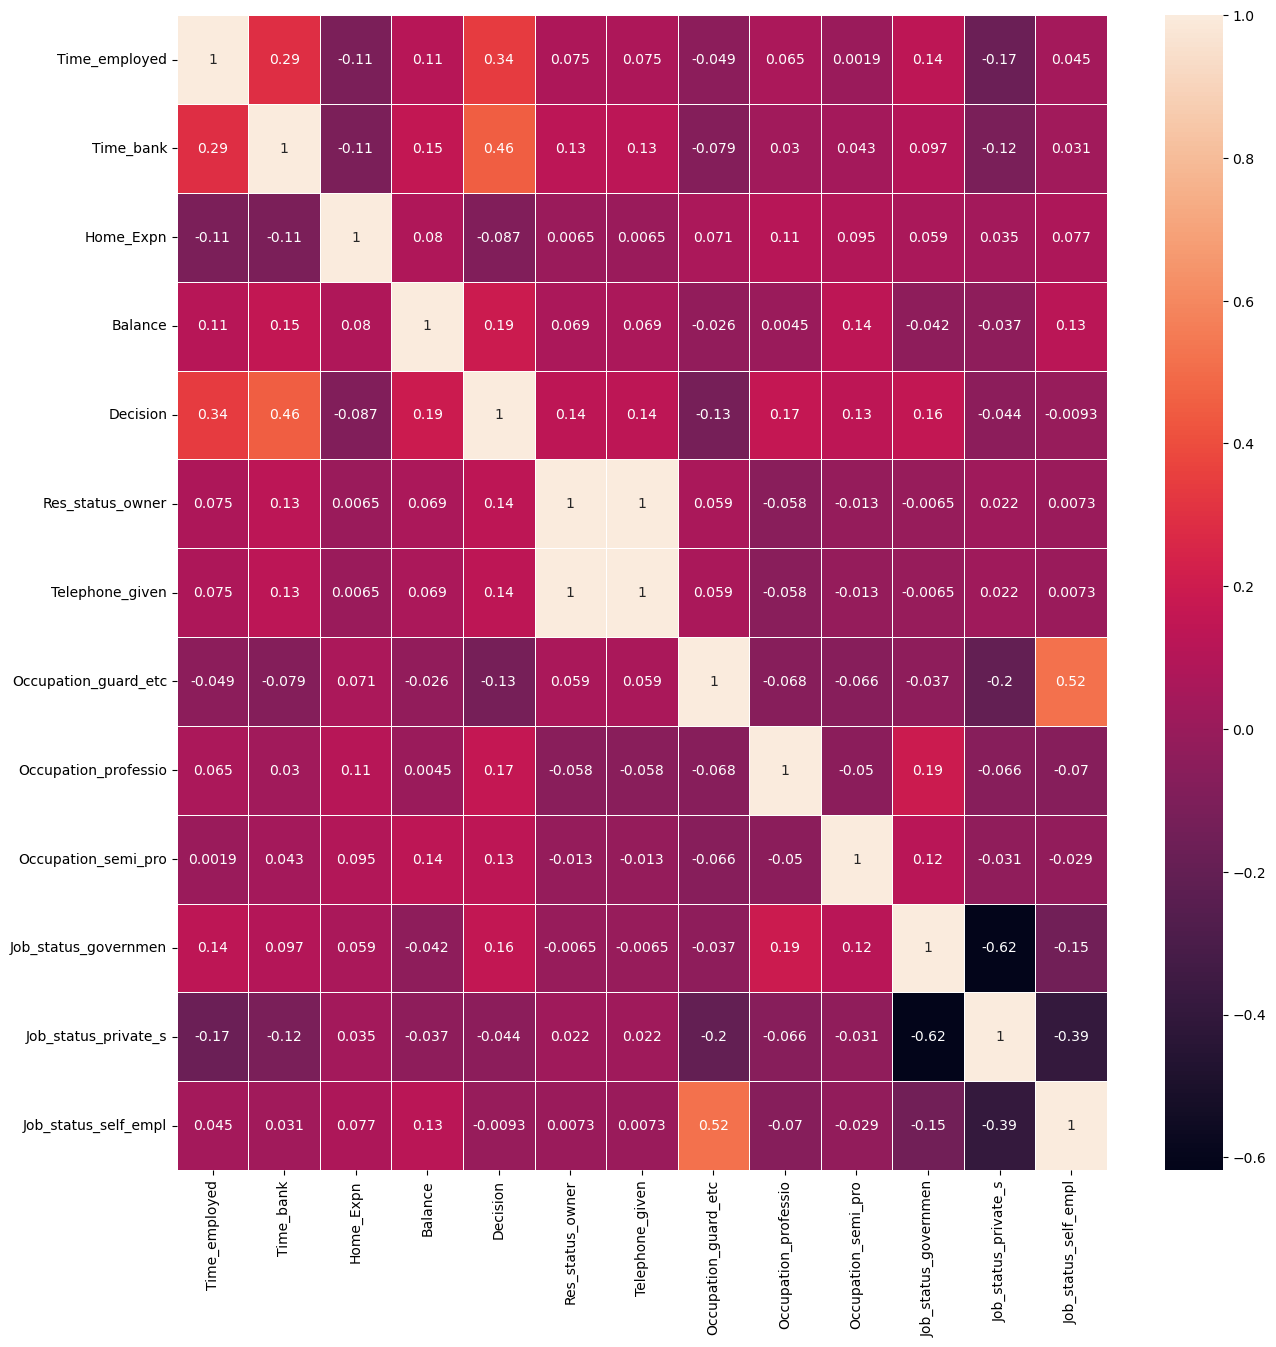

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df_loan.corr(), annot=True, linewidths=.5, ax=ax)